Initial Setup

In [35]:
from application import Simulation, Parameters, Results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

##### Old

In [ ]:
# Uniform
config.path = 'testing.envs.uniform'
config.name = 'Uniform'

uniform = []
for iteration in range(1, iterations+1):
    run, result = single_run(config)
    uniform.append(run)

# Binomal
config.path = 'testing.envs.binomal'
config.name = 'Binomal'

binomal = []
for iteration in range(1, iterations+1):
    run, result = single_run(config)
    binomal.append(run)

# Combination
config.path = 'testing.envs.combination'
config.name = 'Combination'

combination = []
for iteration in range(1, iterations+1):
    run, result = single_run(config)
    combination.append(run)

# Combination2
config.path = 'testing.envs.combination2'
config.name = 'Combination2'

combination2 = []
for iteration in range(1, iterations+1):
    run, result = single_run(config)
    combination2.append(run)

fig, ax = plt.subplots(figsize=(5, 5))

x = range(1, iterations+1)
bu_a, bu_b = np.polyfit(x, uniform, 1)
bb_a, bb_b = np.polyfit(x, binomal, 1)
bc_a, bc_b = np.polyfit(x, combination, 1)
bc2_a, bc2_b = np.polyfit(x, combination2, 1)

ax.scatter(x, uniform, c='b', label='Uniform Interactions')
ax.plot(x, bu_a*x+bu_b, c='b')
ax.scatter(x, binomal, c='r', label='Binomal Interactions')
ax.plot(x, bb_a*x+bb_b, c='r')
ax.scatter(x, combination, c='g', label='Combination Interactions')
ax.plot(x, bc_a*x+bc_b, c='g')
ax.scatter(x, combination2, c='y', label='Combination2 Interactions')
ax.plot(x, bc2_a*x+bc2_b, c='y')

ax.set_title('Execution Time vs. Interaction')
ax.set_xlabel('Iteration')
ax.set_ylabel('Execution Time (s)')

plt.show()

In [ ]:
options = [('testing.envs.binomal', 'Binomal', 'r'), ('testing.envs.uniform', 'Uniform', 'b'), ('testing.envs.combination', 'Combination', 'g'), ('testing.envs.combination2', 'Combination2', 'y')]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
ax = ax.flatten()

ax[0].set_title('Number of Susceptible')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Cases')

ax[1].set_title('Number of Infected')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Cases')

ax[2].set_title('Number of Passed')
ax[2].set_xlabel('Day')
ax[2].set_ylabel('Number of Cases')

for i in range(11):

    for option in options:

        config.seed = 10002
        config.path = option[0]
        config.name = option[1]

        duration, data = single_run(config)
        data_summary = {key:[] for key in data[0].keys()}
        for day in data.keys():
            vals = data[day]
            data_summary['susceptible'].append(vals['susceptible'])
            data_summary['infected'].append(vals['infected'])
            data_summary['passed'].append(vals['passed'])
        days = np.arange(0, len(data_summary['susceptible']))

        ax[0].plot(days, data_summary['susceptible'], color=option[2], label=option[1])
        ax[1].plot(days, data_summary['infected'], color=option[2], label=option[1])
        ax[2].plot(days, data_summary['passed'], color=option[2], label=option[1])

In [ ]:
x = 0.02
n = 10
mean = 0.5
step = 0.0025
cycles = 100

stds = []
errors = []

for i in range(cycles+1):
    std = i * step
    v = np.random.uniform(mean-std, mean+std, size=n)
    
    avg_v = sum(v) / n
    r1 = (x + avg_v)**n
    r2 = 1
    for val in v : r2 *= (x + val)

    error = abs(r1 - r2)
    stds.append(std)
    errors.append(error)

stds = np.array(stds)
errors = np.array(errors)

a, b = np.polyfit(stds, errors, 1)
print(f'{a} {b}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(stds, errors, c='b')
ax.plot(stds, a*stds+b, c='r')

max_error = np.max(errors)
scaling = 1
print(f'The maximum error was {max_error} > multiplied by {scaling} = {max_error*scaling}')

##### Execution Modes
A comparison between the three different execution modes: serial, multiprocessing and multithreading.

In [30]:
# Set benchmarking parameters
models_min = 1
models_max = 10
iterations = 10

# Options to test
options = [('serial', 'r'), ('multiprocessing', 'b'), ('multithreading', 'g')]

Time Comparison

Completed serial benchmarking (total time: 66.53515)s
Completed multiprocessing benchmarking (total time: 38.05101)s
Completed multithreading benchmarking (total time: 100.93739)s


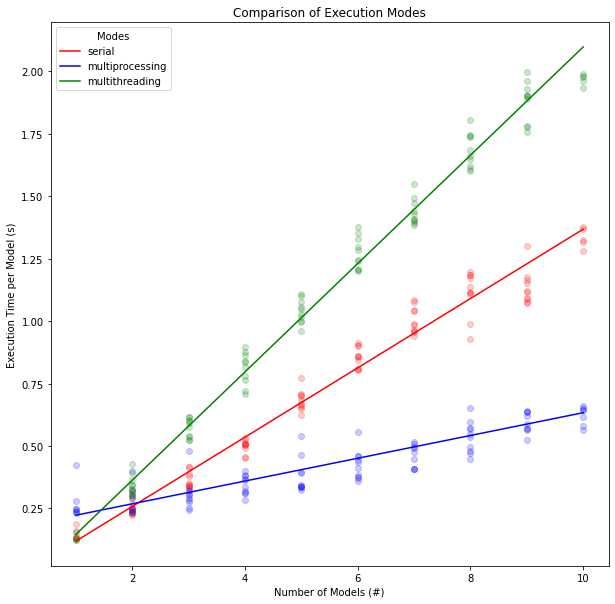

In [6]:
# Setup the parameters using the correct JSON configuration file
config_file = 'custom/config.json'
parameters = Parameters(config_file)
parameters.verbose = False
parameters.days = 100

# Create the graphs
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Comparison of Execution Modes')
ax.set_xlabel('Number of Models (#)')
ax.set_ylabel('Execution Time per Model (s)')

# Run the benchmarking
for mode, color in options:
    parameters.mode = mode
    models_count = []
    execution_time = []

    # Run the simulations
    for m in range(models_min, models_max + 1):
        parameters.models = m

        for i in range(iterations):
            sim = Simulation()
            sim.set_parameters(parameters)
            sim.compile()

            start = time.time()
            sim.run()
            end = time.time()

            models_count.append(m)
            execution_time.append(round(end-start, 10))

    # Plot the line of best fit
    a, b = np.polyfit(models_count, execution_time, 1)
    ax.plot(models_count, a*np.array(models_count)+b, color=color, label=mode)

    # Filter out top & bottom 5% of results
    lq, uq = np.quantile(execution_time, [0.05, 0.95])
    out_of_range = []
    for index in range(len(models_count)):
        if execution_time[index] < lq or execution_time[index] > uq : out_of_range.append(index)
    models_count = [models_count[x] for x in range(len(models_count)) if x not in out_of_range]
    execution_time = [execution_time[x] for x in range(len(execution_time)) if x not in out_of_range]

    # Plot the results
    ax.scatter(models_count, execution_time, color=color, alpha=0.2)

    # Output progress of benchmarking
    print(f'Completed {mode} benchmarking (total time: {round(sum(execution_time), 5)})s')

plt.legend(title='Modes')
plt.show()

Results Comparison

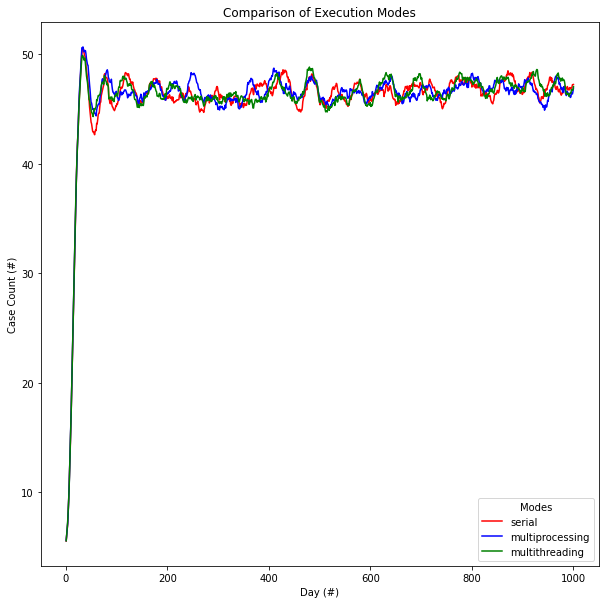

In [31]:
# Setup the parameters using the correct JSON configuration file
config_file = 'custom/config.json'
parameters = Parameters(config_file)
parameters.verbose = False
parameters.seed = np.random.randint(0, 100000)
parameters.models = models_max * iterations

# Create the graphs
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Comparison of Execution Modes')
ax.set_xlabel('Day (#)')
ax.set_ylabel('Case Count (#)')

# Run the benchmarking
for mode, color in options:
    results = Results()
    sim = Simulation()
    sim.set_parameters(parameters)
    sim.set_results(results)
    sim.compile()
    sim.run()

    days = results.states.keys()
    cases = []
    for day in days:
        all_states = results.states[day]
        cases.append(sum([all_states[state] for state in all_states.keys() if state not in ['passed', 'suscepti', 'suscept']]))

    ax.plot(days, cases, c=color, label=mode)

plt.legend(title='Modes')
plt.show()

##### Variabilty of Results
A comparison of how results vary based on the number of models used.

In [20]:
# Benchmarking parameters
interations = 10

In [36]:
# Setup the parameters using the correct JSON configuration file
config_file = 'custom/config.json'
parameters = Parameters(config_file)
parameters.verbose = False
parameters.models = 15
parameters.mode = 'multithreading'

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Variability of Results')
ax.set_xlabel('Day (#)')
ax.set_ylabel('Case Count (#)')

# Run the simulations
for i in range(iterations):
    results = Results()
    sim = Simulation()
    sim.set_parameters(parameters)
    sim.set_results(results)
    sim.compile()
    sim.run()

    days = results.states.keys()
    cases = []

    for day in days:

        all_states = results.states[day]
        cases.append(sum([all_states[state] for state in all_states.keys() if state not in ['passed', 'suscepti', 'suscept']]))

    ax.plot(days, cases, c='grey', alpha=0.25)

plt.show()

##### Interaction Modes
A comparison between the different interaction modes: uniform, binomal, combination, combintation2

In [32]:
pass

##### Other

In [33]:
pass